<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

In [495]:
#Importation de la librairie Pandas
import pandas as pd

In [497]:
#Importation de la librairie plotly express
import plotly.express as px

In [499]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

C:\Users\quent\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning:

Unknown extension is not supported and will be removed

C:\Users\quent\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning:

Unknown extension is not supported and will be removed

C:\Users\quent\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning:

Unknown extension is not supported and will be removed



In [500]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [501]:
# Pour afficher uniquement les noms des colonnes
print("Le tableau comporte les noms {} pour les colonnes".format(df_erp.columns.tolist()))

Le tableau comporte les noms ['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status', 'purchase_price'] pour les colonnes


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [505]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [509]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))
print('________________')
#La nature des données dans chacune des colonnes
print("Les types de colonnes sont :\n{} ".format(df_erp.dtypes))
print('________________')
#Le nombre de valeurs présentes dans chacune des colonnes
print("Le nombre de valeurs présentes dans chacune des colonnes est :\n{} ".format(df_erp.count()))

Le tableau comporte 6 colonne(s)
________________
Les types de colonnes sont :
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object 
________________
Le nombre de valeurs présentes dans chacune des colonnes est :
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64 


In [511]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [514]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
print("Il y a {} doublons dans la colonne producti_id ".format(df_erp.product_id.duplicated(keep='first').sum()))

Il y a 0 doublons dans la colonne producti_id 


In [516]:
#Afficher les valeurs distinctes de la colonne stock_status
df_erp.stock_status.unique()

#À quelle(s) autre(s) colonne(s) sont-elles liées ?

print("Elle est liée à la colonne stock_quantity")

Elle est liée à la colonne stock_quantity


In [518]:
#Création d'une colonne "stock_status_2"
df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(lambda x: 'outofstock' if x <= 0  else 'instock')
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"  
print(df_erp[['product_id', 'stock_quantity', 'stock_status_2']])

     product_id  stock_quantity stock_status_2
0          3847              16        instock
1          3849              10        instock
2          3850               0     outofstock
3          4032              26        instock
4          4039               3        instock
5          4040              12        instock
6          4041              12        instock
7          4042              15        instock
8          4043               0     outofstock
9          4045               5        instock
10         4046               2        instock
11         4047               0     outofstock
12         4048              24        instock
13         4049              25        instock
14         4050              42        instock
15         4051               0     outofstock
16         4052               0     outofstock
17         4053               7        instock
18         4054               6        instock
19         4055               0     outofstock
20         40

In [520]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76      True

In [522]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
print((df_erp["stock_status"] == df_erp["stock_status_2"]).sum())

823


In [524]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
df_erp.loc[df_erp["stock_status"] != df_erp["stock_status_2"]]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock


In [526]:
#Corriger la ou les données incohérentes
df_erp.iloc[4, 4] = 'instock'
df_erp.iloc[398, 4] = 'outofstock'
#Verification en utilisant le même code que plus haut pour afficher les problemes
print((df_erp["stock_status"] == df_erp["stock_status_2"]).sum())

825


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [530]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
print(df_erp.loc[df_erp['price'] <= 0])
print('_______________________________')
print(df_erp['price'].isna().values.any())
print('_______________________________')
print(df_erp.loc[df_erp['price'] == ''])
print('_______________________________')

#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['price'].loc[df_erp['price'] <= 0].count()))

print('_______________________________')
#Afficher le prix minimum de la colonne "price"
print(df_erp['price'].min())
#Afficher le prix maximum de la colonne "price"
print(df_erp['price'].max())
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
# df_erp['price']= df_erp['price'].abs() 
# print(df_erp.loc[df_erp['price'] <= 0])
# en parler avec les autres responsables businesss en entreprise

     product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price stock_status_2  
151           10.33     outofstock  
469            4.34     outofstock  
739            4.61        instock  
_______________________________
False
_______________________________
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_status_2]
Index: []
_______________________________
Nombres d'article avec un prix non renseignés: 3
_______________________________
-20.0
225.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [533]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("La quantité minimum est : {}".format(df_erp['stock_quantity'].min()))
print('_______________________________')
#Afficher la quantité maximum de la colonne "stock_quantity"
print("La quantité maximum est : {}".format(df_erp['stock_quantity'].max()))
print('_______________________________')

#Affichier les stocks inférieurs à 0
print(df_erp.loc[df_erp['stock_quantity'] < 0])
df_erp['stock_quantity'] = df_erp['stock_quantity'].clip(lower=0)
#Il faudrait vérifier, dans un premier temps, que ce ne soit pas une erreur de frappe
# donc vérifier si les produits sont en stock et dans les quantités indiquées en négatif dans le dataframe
# mettre à zéro et faire la remarque aux autres responsables logistique

La quantité minimum est : -10
_______________________________
La quantité maximum est : 145
_______________________________
     product_id  onsale_web  price  stock_quantity stock_status  \
449        4973           0   10.0             -10   outofstock   
573        5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
449            4.96     outofstock  
573           22.30     outofstock  


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [536]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
print("Les valeurs uniques sont : {}".format(df_erp['onsale_web'].unique()))
#D'après le nom de la colonne et du type binaire, il s'agit de savoir si le produit a été commandé en ligne ou non

Les valeurs uniques sont : [1 0]


In [538]:
#Quelles sont les colonnes à conserver selon vous?
# Toutes sauf "stock_status"

In [540]:
#Supprimer la colonnecomportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp.pop('stock_status')
df_erp.rename(columns={'stock_status_2': 'stock_status'}, inplace=True)
df_erp.head()
# renommer "stock_status_2" / enlever le 2

,product_id,onsale_web,price,stock_quantity,purchase_price,stock_status
0,3847,1,24.2,16,12.88,instock
1,3849,1,34.3,10,17.54,instock
2,3850,1,20.8,0,10.64,outofstock
3,4032,1,14.1,26,6.92,instock
4,4039,1,46.0,3,23.77,instock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [543]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
print("Il y a {} prix non renseigné(s) dans la colonne purchase_price".format(df_erp['purchase_price'].isna().sum()))
#Afficher le prix minimum de la colonne "purchase_price"
print("La quantité minimum est : {}".format(df_erp['purchase_price'].min()))
#Afficher le prix maximum de la colonne "purchase_price"
print("La quantité minimum est : {}".format(df_erp['purchase_price'].max()))


Il y a 0 prix non renseigné(s) dans la colonne purchase_price
La quantité minimum est : 2.74
La quantité minimum est : 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [546]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [548]:
#Consulter le nombre de colonnes -- Vu au dessus ?
print(df_web.shape[1])
print('________________')
#La nature des données dans chacune des colonnes
print(df_web.dtypes)
print('________________')
#Le nombre de valeurs présentes dans chacune des colonnes
print(df_web.count())

29
________________
sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                

In [550]:
#Selon vous, quelles sont les colonnes à conserver ?
#Celles qui ne sont pas nulles

In [552]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web = df_web.dropna(subset=["sku"])
print(df_web.count())
# Mentionner les colonnes supprimées

sku                      1428
virtual                  1428
downloadable             1428
rating_count             1428
average_rating           1428
total_sales              1428
tax_status                714
tax_class                   0
post_author              1428
post_date                1428
post_date_gmt            1428
post_content                0
product_type             1427
post_title               1428
post_excerpt              714
post_status              1428
comment_status           1428
ping_status              1428
post_password               0
post_name                1428
post_modified            1428
post_modified_gmt        1428
post_content_filtered       0
post_parent              1428
guid                     1428
menu_order               1428
post_type                1428
post_mime_type            714
comment_count            1428
dtype: int64


In [554]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
#Colonnes à supprimer (contenant 'post')
specific_cols_to_drop = ['virtual', 'downloadable', 'rating_count', 'average_rating', 'tax_status', 'tax_class', 'comment_status', 'ping_status', 'guid',
                        'menu_order', 'comment_count']
similar_cols_to_drop = [col for col in df_web.columns if 'post' in col]

cols_to_drop = specific_cols_to_drop + similar_cols_to_drop
#Afficher les colonnes à supprimer
print("Colonnes à supprimer :", cols_to_drop)

#Suppression des colonnes
df_web = df_web.drop(columns=cols_to_drop)

print("\nDataFrame après suppression :")
print(df_web.count())
print(df_web.head())
# Mentionner les colonnes supprimées

Colonnes à supprimer : ['virtual', 'downloadable', 'rating_count', 'average_rating', 'tax_status', 'tax_class', 'comment_status', 'ping_status', 'guid', 'menu_order', 'comment_count', 'post_author', 'post_date', 'post_date_gmt', 'post_content', 'post_title', 'post_excerpt', 'post_status', 'post_password', 'post_name', 'post_modified', 'post_modified_gmt', 'post_content_filtered', 'post_parent', 'post_type', 'post_mime_type']

DataFrame après suppression :
sku             1428
total_sales     1428
product_type    1427
dtype: int64
     sku  total_sales product_type
0  11862          3.0          Vin
1  16057          5.0          Vin
2  14692          5.0          Vin
3  16295         14.0          Vin
4  15328          2.0          Vin


In [556]:
#Visualisation des valeurs de la colonne sku
print(df_web['sku'])
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
# Les valeurs non renseignées / Les valeurs avec un tiret "-" / Les valeurs de moins de 5 chiffres

0                     11862
1                     16057
2                     14692
3                     16295
4                     15328
5                     15471
6                     16515
7                     16246
9                     13572
10                    16513
11                    16585
12                    16269
13                    15526
14                    12869
15                    15575
16                    11586
17                    14338
18                    15425
19                    16560
21                    15361
22                    13809
23                    11587
24                    15022
25                    14323
26                    16342
27                    16029
28                    15475
29                    13754
31                    14680
32                    15875
33                     9636
34                    13849
35                    13662
36                    16564
38                    13557
39                  

In [558]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
df_web['sku_string'] = df_web['sku'].astype(str)
invalid_codes = df_web[~ df_web['sku_string'].str.match(r'^[0-9]{5}$')]
print(invalid_codes)

                      sku  total_sales   product_type           sku_string
33                   9636          0.0         Whisky                 9636
48                    804          3.0            Vin                  804
149                  3506          3.0         Cognac                 3506
167                  9937          2.0            Vin                 9937
185                   802          5.0            Vin                  802
191                  4679          0.0      Champagne                 4679
194                  3509          5.0         Cognac                 3509
195                  2534          4.0            Vin                 2534
214                   791          1.0            Vin                  791
256                   793          1.0            Vin                  793
272               13127-1          4.0            Vin              13127-1
297                   304          8.0      Champagne                  304
331                  7033

In [560]:
df_web = df_web.drop(['sku_string'], axis=1)
print(df_web.dtypes)

sku              object
total_sales     float64
product_type     object
dtype: object


In [562]:
#Identifier les lignes sans code articles
print(df_web.loc[df_web['sku'].isna()])

Empty DataFrame
Columns: [sku, total_sales, product_type]
Index: []


In [564]:
#Pour les codes articles identifiés, réaliser une analyse et définissez l'action à entreprendre
#On pourrait leur redonner un un code random qui ne soit pas déjà dans la colonne
print(df_web.head())

     sku  total_sales product_type
0  11862          3.0          Vin
1  16057          5.0          Vin
2  14692          5.0          Vin
3  16295         14.0          Vin
4  15328          2.0          Vin


In [566]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
print("La colonne comporte {} doublons".format(df_web.sku.duplicated(keep='first').sum()))

La colonne comporte 714 doublons


In [568]:
df_web = df_web.drop_duplicates(subset='sku', keep='first')
print("La colonne comporte {} doublons".format(df_web.sku.duplicated(keep='first').sum()))

La colonne comporte 0 doublons


In [570]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
sku_nan = df_web.loc[df_web['sku'].isna()]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
sku_nan.info()
#3 - Que constatez-vous?


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           0 non-null      object 
 1   total_sales   0 non-null      float64
 2   product_type  0 non-null      object 
dtypes: float64(1), object(2)
memory usage: 0.0+ bytes


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [573]:
#Dimension du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [575]:
#Consulter le nombre de colonnes
print(df_liaison.shape[1])
print('________________')
#La nature des données dans chacune des colonnes
print(df_liaison.dtypes)
print('________________')
#Le nombre de valeurs présentes dans chacune des colonnes
print(df_liaison.count())

2
________________
id_web        object
product_id     int64
dtype: object
________________
id_web        734
product_id    825
dtype: int64


In [577]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
print((df_liaison.product_id.duplicated(keep='first').sum()))

0


In [579]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
#print((df_liaison.id_web.duplicated(keep='first').sum()))
df_liaison[df_liaison['id_web'].notnull()]['id_web'].unique().size

734

In [581]:
#Avons-nous des articles sans correspondances?
print("Il y a {} articles sans correspondances dans la colonnes id_web".format(df_liaison['id_web'].isna().sum()))

Il y a 91 articles sans correspondances dans la colonnes id_web


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [585]:
#Fusion des fichiers df_erp et df_liaison
df_erp_liaison = pd.merge(df_erp, df_liaison, on='product_id')

In [587]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
display(df_erp_liaison.shape)

(825, 7)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [590]:
#Fusionnez les datasets df_merge et df_web

df_merge = pd.merge(df_erp_liaison, df_web,  left_on='id_web', right_on='sku', how='outer', indicator=True)

df_sans_correspondance = df_merge[df_merge["_merge"] != "both"]

print(df_merge.count())
print(df_sans_correspondance.shape)

product_id        825
onsale_web        825
price             825
stock_quantity    825
purchase_price    825
stock_status      825
id_web            734
sku               714
total_sales       714
product_type      714
_merge            825
dtype: int64
(111, 11)


In [592]:
#Avons-nous des lignes sans correspondances?
print(df_merge.isna().sum())

product_id          0
onsale_web          0
price               0
stock_quantity      0
purchase_price      0
stock_status        0
id_web             91
sku               111
total_sales       111
product_type      111
_merge              0
dtype: int64


In [594]:
print(df_merge.head())

   product_id  onsale_web  price  stock_quantity  purchase_price stock_status  \
0        3847           1   24.2              16           12.88      instock   
1        3849           1   34.3              10           17.54      instock   
2        3850           1   20.8               0           10.64   outofstock   
3        4032           1   14.1              26            6.92      instock   
4        4039           1   46.0               3           23.77      instock   

  id_web    sku  total_sales product_type _merge  
0  15298  15298          6.0          Vin   both  
1  15296  15296          9.0          Vin   both  
2  15300  15300          0.0          Vin   both  
3  19814  19814         12.0          Vin   both  
4  19815  19815          3.0          Vin   both  


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

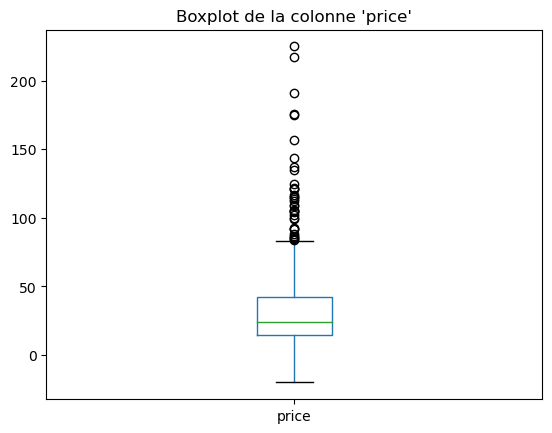

In [598]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
df_merge.boxplot(column =['price'], grid = False)
plt.title("Boxplot de la colonne 'price'")
plt.show()

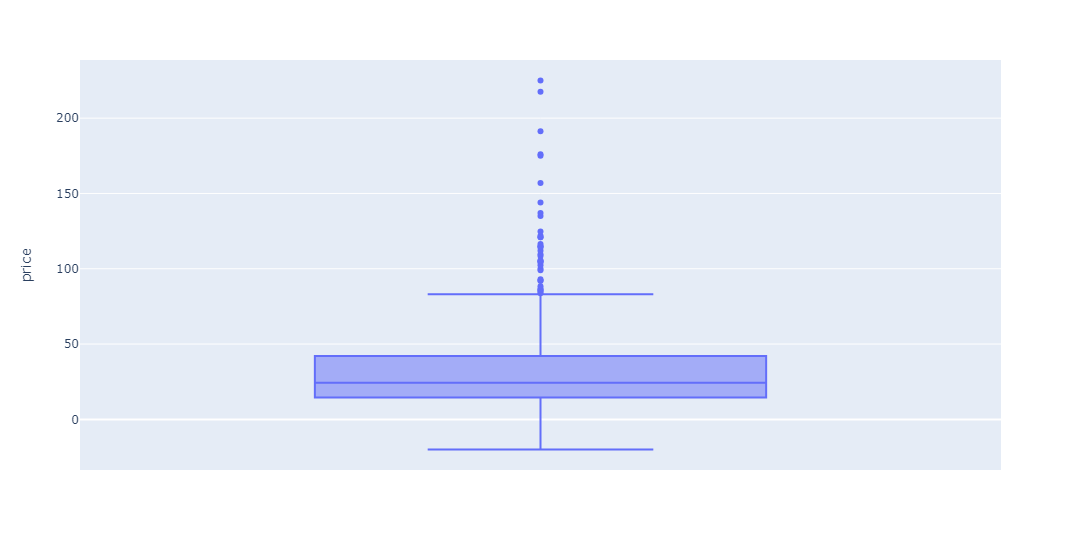

In [599]:
#Autre méthode avec plotly express
box_plot_price = px.box(df_merge, y="price", width=400, height=550)
box_plot_price.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [604]:
#Calculer la moyenne du prix
print("La moyenne du prix est : {}".format(round(df_merge['price'].mean(), 2)))

print('=======================')

#Calculer l'écart-type du prix
print("L'écart-type du prix est : {}".format(round(df_merge['price'].std(axis= 0), 2)))

print('=======================')

#Calculer le Z-score
print("Le Z-score est : {}".format(round(df_merge['price'].mean()/df_merge['price'].std(ddof=0), 2)))



La moyenne du prix est : 32.19
L'écart-type du prix est : 26.71
Le Z-score est : 1.21


In [605]:
#Quel est le seuil prix dont z-score est supérieur à 3?
df_merge['z_score'] = (df_merge['price'] - df_merge['price'].mean())/df_merge['price'].std(ddof=0)
print("Le seuil prix dont le Z-score est supérieur à 3 est : {}".format(df_merge.loc[df_merge['z_score'] > 3][['price']].min()))
#fonction lambda

Le seuil prix dont le Z-score est supérieur à 3 est : price    114.0
dtype: float64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [609]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
describe_merge = round(df_merge['price'].describe(percentiles=None, include=None, exclude=None))
#descirbe sur price pour définir les outliers
display(describe_merge)

count    825.0
mean      32.0
std       27.0
min      -20.0
25%       14.0
50%       24.0
75%       42.0
max      225.0
Name: price, dtype: float64

In [611]:
#Définissez un seuil pour les articles "outliers" en prix

Q1 = df_merge['price'].quantile(0.25)
Q3 = df_merge['price'].quantile(0.75)

# Calculer l'IQR
IQR = Q3 - Q1

# Définir les bornes des outliers
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Filtrer les outliers
outliers = df_merge[(df_merge['price'] < borne_inf) | (df_merge['price'] > borne_sup)]

# Afficher les outliers
print("Outliers détectés :")
print(outliers[['product_id', 'price']])

Outliers détectés :
     product_id  price
19         4055   86.1
30         4594  144.0
47         5070   84.7
55         6324   92.0
154        4115  100.0
156        4132   88.4
291        4352  225.0
297        4359   85.6
310        4402  176.0
311        4404  108.5
313        4406  157.0
314        4407  104.0
320        4582  109.6
477        4903  102.3
478        4904  137.0
525        5001  217.5
530        5007  105.0
531        5008  105.0
538        5025  112.0
539        5026   86.8
605        5565   92.0
610        5580   83.7
615        5612  124.8
657        5767  175.0
692        5892  191.3
707        5916   93.0
708        5917  122.0
709        5918  114.0
752        6126  135.0
757        6201  105.6
758        6202  116.4
763        6212  115.0
764        6213  121.0
765        6214   99.0
766        6215  115.0
767        6216  121.0


In [613]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
display(outliers['price'].count())
display("=================================")
display(round((outliers['price'].count() / df_merge['price'].count()), 2))

36

'================================='

0.04

In [615]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
#On peut vérifier avec le zscore
verification_outliers = df_merge[df_merge['z_score'].abs() > 3]
print(verification_outliers['price'].min())
print(outliers['price'].min())

114.0
83.7


In [617]:
#Par rapport au z_score tous les outliers ne sont pas justifiés.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [621]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_merge['ca_par_article'] = df_merge['price'] * df_merge['total_sales']
#Calculez la somme de la colonne "ca_par_article"
print("La somme de la colonne ca_par_article est : {} €".format(df_merge['ca_par_article'].sum()))
#Ce résultat correspond au chiffre d'affaire du site web

#Ce résultat correspond au chiffre d'affaire du site web

La somme de la colonne ca_par_article est : 153748.1 €


     product_id  price  total_sales  ca_par_article
167        4150   59.0        116.0          6844.0
291        4352  225.0         11.0          2475.0
415        4726   12.7        122.0          1549.4
546        5067   59.9         22.0          1317.8
551        5379   11.1        111.0          1232.1
692        5892  191.3          6.0          1147.8
292        4353   79.5         14.0          1113.0
687        5826   41.2         20.0           824.0
763        6212  115.0          7.0           805.0
539        5026   86.8          9.0           781.2
531        5008  105.0          7.0           735.0
657        5767  175.0          4.0           700.0
752        6126  135.0          5.0           675.0
538        5025  112.0          6.0           672.0
757        6201  105.6          6.0           633.6
313        4406  157.0          4.0           628.0
359        4647   28.5         22.0           627.0
296        4358   77.0          8.0           616.0
297        4

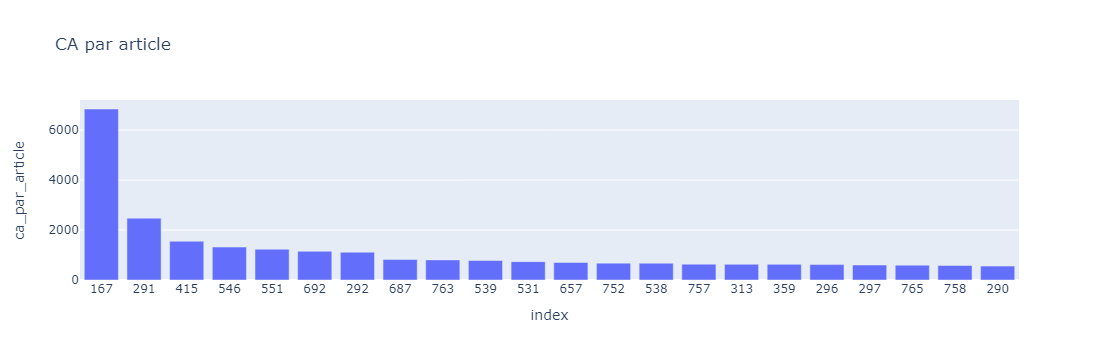

In [623]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge.sort_values('ca_par_article', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index()
#Afficher les 20 premier articles en CA
print(df_merge.sort_values('ca_par_article', ascending=False).iloc[0:2+20][['product_id', 'price', 'total_sales','ca_par_article']])
#Graphique en barre des 20 premiers articles avec plotly express
best_ca = df_merge.sort_values('ca_par_article', ascending=False).iloc[0:2+20][['product_id','ca_par_article']]
fig = px.bar(best_ca, y='ca_par_article', title= 'CA par article')
fig.update_xaxes(type='category')
fig.show()

In [624]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge['total_ca'] = df_merge['ca_par_article'].sum()
df_merge = df_merge.sort_values('ca_par_article', ascending=False)
df_merge.reset_index()
df_merge['pourcentage_ca'] = df_merge['ca_par_article'] / df_merge['total_ca']

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['somme_cumulative_pourcentage_ca'] = df_merge['pourcentage_ca'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
print((df_merge.sort_values('ca_par_article', ascending=False).loc[df_merge['somme_cumulative_pourcentage_ca'] <= 0.80 ]
      [['price', 'ca_par_article', 'total_sales', 'somme_cumulative_pourcentage_ca']]))

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web

print('===================================')
print((df_merge['total_sales'].loc[df_merge['somme_cumulative_pourcentage_ca'] <= 0.80 ]
        ).count())
#433


print('===================================')
print((df_merge['product_id'].loc[df_merge['somme_cumulative_pourcentage_ca'] <= 0.80 ]
        ).count() / df_merge['product_id'].count())

      price  ca_par_article  total_sales  somme_cumulative_pourcentage_ca
167   59.00         6844.00        116.0                         0.044514
291  225.00         2475.00         11.0                         0.060612
415   12.70         1549.40        122.0                         0.070690
546   59.90         1317.80         22.0                         0.079261
551   11.10         1232.10        111.0                         0.087275
692  191.30         1147.80          6.0                         0.094740
292   79.50         1113.00         14.0                         0.101979
687   41.20          824.00         20.0                         0.107339
763  115.00          805.00          7.0                         0.112574
539   86.80          781.20          9.0                         0.117655
531  105.00          735.00          7.0                         0.122436
657  175.00          700.00          4.0                         0.126989
752  135.00          675.00          5

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

     product_id  total_sales
415        4726        122.0
167        4150        116.0
551        5379        111.0
461        4867         36.0
213        4203         27.0
266        4275         24.0
546        5067         22.0
359        4647         22.0
755        6129         20.0
687        5826         20.0
226        4220         18.0
665        5778         17.0
675        5803         17.0
783        6569         17.0
463        4870         16.0
150        4105         16.0
201        4188         16.0
664        5777         16.0
458        4863         16.0
629        5695         16.0
113        4059         16.0
189        4173         15.0


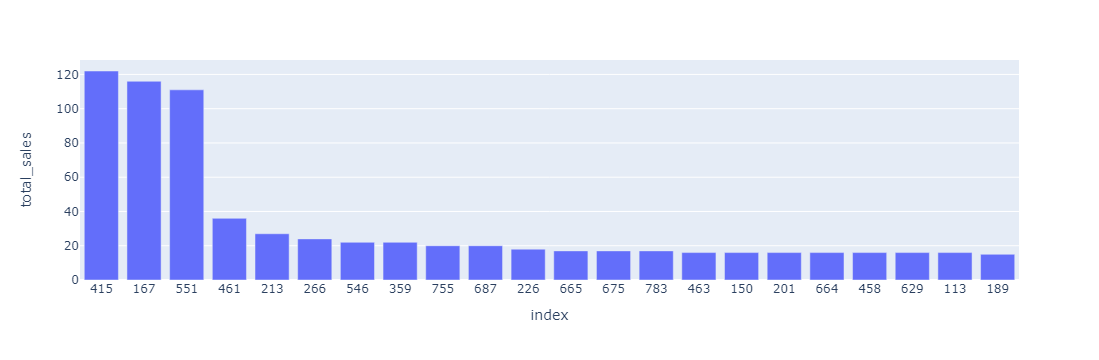

In [628]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge = df_merge.sort_values('total_sales', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index()
#Afficher les 20 premier articles en quantité
print(df_merge.sort_values('total_sales', ascending=False).iloc[0:2+20][['product_id','total_sales']])
#Graphique en barre des 20 premiers articles avec plotly express
stock_quantity = df_merge.sort_values('total_sales', ascending=False).iloc[0:2+20][['product_id','total_sales']]
fig = px.bar(stock_quantity, y='total_sales')
fig.update_xaxes(type='category')
fig.show()

In [630]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_merge['total_stock'] = df_merge['stock_quantity'].sum()
df_merge['quantity_percentage'] = df_merge['stock_quantity'] / df_merge['total_stock']
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['cumsum_quantity_percentage'] = df_merge['quantity_percentage'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
print((df_merge.sort_values('stock_quantity', ascending=False).loc[df_merge['cumsum_quantity_percentage'] <= 0.80 ]
      [['product_id','stock_quantity', 'total_stock', 'quantity_percentage', 'cumsum_quantity_percentage']]))
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print('===================================')
print((df_merge['stock_quantity'].loc[df_merge['cumsum_quantity_percentage'] <= 0.80 ]
        ).count())
print('===================================')
print(round((df_merge['product_id'].loc[df_merge['cumsum_quantity_percentage'] <= 0.80 ]
        ).count() / df_merge['product_id'].count(), 2))

     product_id  stock_quantity  total_stock  quantity_percentage  \
290        4350             145        17822             0.008136   
286        4334             142        17822             0.007968   
538        5025             136        17822             0.007631   
292        4353             127        17822             0.007126   
654        5761             125        17822             0.007014   
167        4150             123        17822             0.006902   
160        4141             123        17822             0.006902   
461        4867             121        17822             0.006789   
297        4359             112        17822             0.006284   
537        5024             103        17822             0.005779   
539        5026             101        17822             0.005667   
164        4147             100        17822             0.005611   
514        4970             100        17822             0.005611   
692        5892              98   

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

161    31.250000
752    27.600000
294    27.000000
289    25.000000
165    23.666667
295    23.000000
162    22.750000
538    22.666667
290    20.714286
286    20.285714
166    20.200000
615    19.000000
320    18.000000
537    17.166667
514    16.666667
692    16.333333
297    16.000000
160    15.375000
163    14.333333
540    13.166667
164    12.500000
654    12.500000
287    12.166667
154    12.000000
539    11.222222
296    10.125000
541     9.500000
292     9.071429
525     9.000000
767     7.000000
477     6.000000
530     5.000000
311     4.250000
709     4.000000
708     4.000000
310     3.666667
14      3.500000
795     3.500000
395     3.500000
128     3.500000
217     3.500000
766     3.500000
435     3.500000
420     3.500000
810     3.500000
284     3.466667
754     3.461538
535     3.461538
702     3.454545
494     3.454545
110     3.454545
760     3.454545
776     3.454545
421     3.454545
384     3.444444
381     3.444444
424     3.444444
653     3.428571
485     3.4285

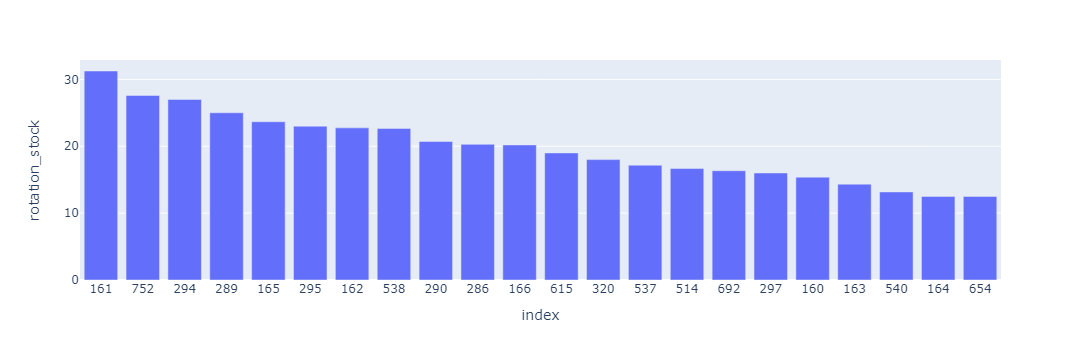

In [633]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 
import numpy as np
#Création de la colonne Rotation de stock
df_merge['rotation_stock'] = df_merge['stock_quantity'] / df_merge['total_sales']
#Remplacement des "inf" par 0
df_merge['rotation_stock'] = df_merge['rotation_stock'].replace([np.inf, -np.inf], 0)
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_merge = df_merge.sort_values('rotation_stock', ascending=False)
df_merge.reset_index()
display(df_merge['rotation_stock'])
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
rotation_stock = df_merge.sort_values('rotation_stock', ascending=False).iloc[0:2+20][['product_id', 'rotation_stock', 'stock_quantity']]
fig = px.bar(rotation_stock, y='rotation_stock')
fig.update_xaxes(type='category')
fig.show()

In [634]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_merge['Valorisation_stock_euros'] = df_merge['stock_quantity'] * df_merge['price']
#Calculer la somme de la colonne "Valorisation_stock_euros"
display(df_merge['Valorisation_stock_euros'].sum())

531773.3

In [637]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
display(df_merge['stock_quantity'].sum())

17822

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [640]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_merge['prix_HT'] = df_merge['price'] * 0.8
#Création de la colonne Taux de marge
df_merge['marge'] = df_merge['price'] - df_merge['purchase_price']
df_merge['taux_marge'] = df_merge['marge'] / df_merge['price']
#Afficher le prix minimum de la colonne "taux_marge"
display(df_merge['taux_marge'].min())
#Afficher le prix maximum de la colonne "taux_marge"
display(df_merge['taux_marge'].max())

-5.12490118577075

1.5425

In [642]:
#affichage de la ligne avec un taux de marge inférieur à 0
print(df_merge.loc[df_merge['taux_marge'] < 0][['product_id', 'price', 'purchase_price', 'stock_quantity', 'prix_HT', 'taux_marge']])

     product_id  price  purchase_price  stock_quantity  prix_HT  taux_marge
293        4355  12.65           77.48              97    10.12   -5.124901
55         6324  92.00           99.00              18    73.60   -0.076087
105        7196  31.00           31.20              55    24.80   -0.006452
459        4864   8.30            9.99               0     6.64   -0.203614


In [644]:
#création d'un dataframe avec les taux positifs
df_marge = df_merge['taux_marge'].abs()
#Afficher le prix minimum de la colonne "taux_marge"
display(round(df_marge.min(), 1))
#Afficher le prix maximum de la colonne "taux_marge"
display(round(df_marge.max(), 2))

0.0

5.12

    product_type  taux_marge
0          Autre    0.468000
1      Champagne    0.206608
2         Cognac    0.542230
3            Gin    0.523333
4  Huile d'olive    0.374985
5            Vin    0.483436
6         Whisky    0.540991


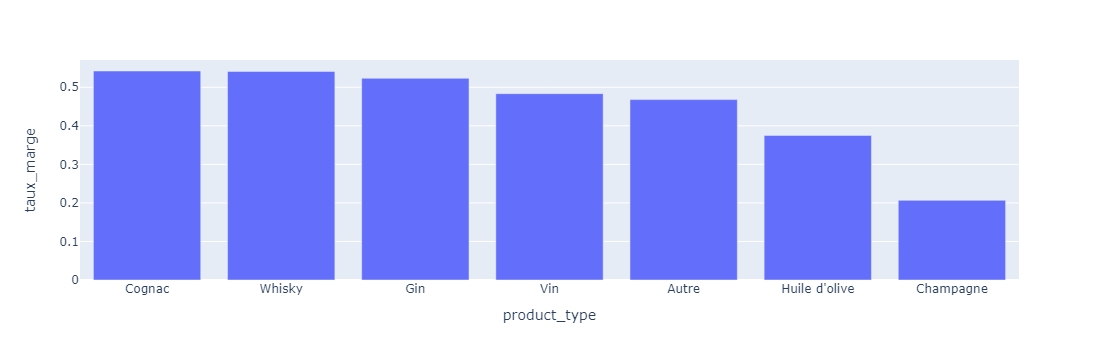

In [646]:
#création d'un dataframe avec le taux de marge moyen par type de produit
df_moyenne_marge = df_merge.groupby('product_type')['taux_marge'].mean().reset_index()

#Affichage dans un graphique du taux de marge par type de produit
print(df_moyenne_marge)

graphique_taux_moyenne_marge = df_moyenne_marge.sort_values('taux_marge', ascending=False)
fig = px.bar(graphique_taux_moyenne_marge, y='taux_marge', x='product_type')
fig.update_xaxes(type='category')
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

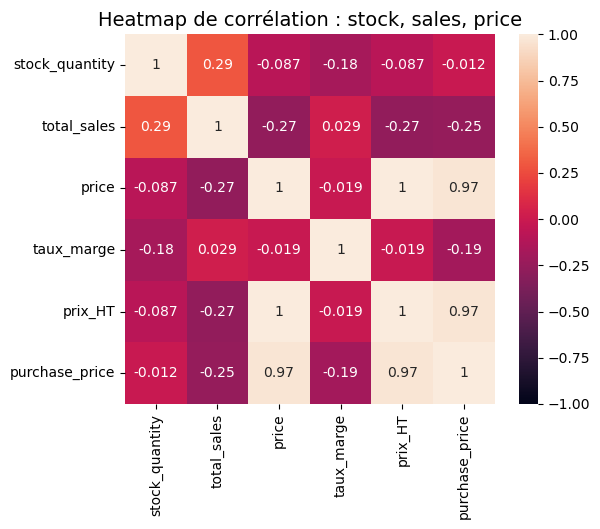

In [649]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
#Création d'un heatmap de correlation avec les variables stock, sales et price
df_correlation = df_merge[['stock_quantity',  'total_sales', 'price', 'taux_marge', 'prix_HT', 'purchase_price']]
correlation = df_correlation.corr()
# Affichage de la heatmap avec Seaborn
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, square=True)
# Ajouter un titre
plt.title("Heatmap de corrélation : stock, sales, price", fontsize=14)
# Afficher le graphique
plt.show()

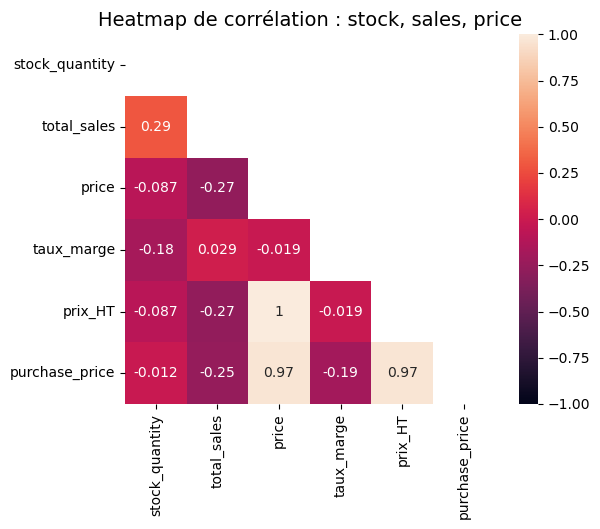

In [650]:
#on peut également créer un mask pour n'afficher qu'une demi heatmap
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, mask=mask, vmin=-1, vmax=1, square=True)
# Ajouter un titre
plt.title("Heatmap de corrélation : stock, sales, price", fontsize=14)
# Afficher le graphique
plt.show()

In [653]:
#Que peut-on conclure des correlations ?


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [656]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
df_merge.to_excel('df_merge.xlsx', index=False)

print("Le dataset a été transformé en fichier Excel.")

Le dataset a été transformé en fichier Excel.
